<a href="https://colab.research.google.com/github/ParichayaHongthongkum/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [3]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas


In [4]:
Name = 'ปริชญา หงส์ทองคำ'
ID = '623020528-4'

In [5]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [6]:
Data = DataGenerator(Name,ID)

020:30:16


In [7]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-10.187117,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964,11.290718,-50.264820
1,8.802957,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808,-19.360529,25.769040
2,4.566708,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315,20.176137,20.181577
3,-1.557750,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722,-11.239992,37.273609
4,9.105714,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226,-21.837186,27.276130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.012739,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069,-11.964788,55.400344
9996,1.971844,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355,18.702787,6.066777
9997,4.313977,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278,15.637518,18.611389
9998,3.029997,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758,-15.500938,-51.618788


In [8]:
Data.shape # ขนาดของข้อมูลที่ได้มา

(10000, 32)

ขนาดของ Correlation จากข้อมูล

In [9]:
corr = np.corrcoef(Data.to_numpy().T)

In [10]:
corr.shape

(32, 32)

การหาค่าสัมประสิทธิ์ความสัมพันธ์ Correlation ที่ซ้ำกันเพื่อจัดการข้อมูลนั้นออกไป

In [11]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0


In [12]:
datatwo = Data.iloc[:,1:30]
datatwo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964
1,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808
2,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315
3,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722
4,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069
9996,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355
9997,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278
9998,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758


In [13]:
datatwo.shape ## ดูขนาดของ datatwo

(10000, 29)

## **2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**import**

In [14]:
from sklearn.cluster import KMeans

**define**

In [15]:
kmeans = KMeans(n_clusters=4, random_state=2021) 

**fit-transform**

In [16]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

**แสดงจุด cluster centers ที่คำนวณออกมาได้**

In [17]:
kmeans.cluster_centers_ # ค่า kmeans center ในแต่ล่ะ cluster

array([[  1.13247584,  -8.98471821,   5.74243783,   5.74692286,
          1.57479407,   0.65327006,  -2.16139838,   1.0659275 ,
         -3.46662618,   0.51778728,   4.97349219,   4.79351653,
          5.34328056,   6.83417247,  -1.6133549 ,   0.10898148,
         -2.91279617,   3.91399258,  -0.36658199,   1.32922292,
         -0.24887875,  -0.33656795,  -4.05376659,  -5.39341288,
         -3.15105153,  -1.42817241,   0.49364093,  -0.75593431,
         -1.94140322,  -8.72784009, -17.96943642, -41.63920045],
       [  2.3892272 ,  -3.5548321 ,  -0.34095539,   4.41661929,
         -1.65436   ,   6.09190915,   4.72665905,  -1.92567101,
         -2.96014842,  -2.10358362,   2.56720858,  -0.44680318,
          1.48083498,   2.83968789,   5.92513848,   1.85145904,
         -0.31335688,   3.09411547,   5.12122765,  -0.42190185,
          0.52112534,   1.99941285,   3.90176196,   1.45698254,
          6.11001787,   0.24083308,  -1.11091121,   0.9351135 ,
         -0.97077744,   7.15549555,  -7

**ทดสอบการจัดกลุ่มด้วย Kmean**

In [30]:
p = kmeans.predict(Data)
p

array([1, 3, 6, ..., 6, 4, 6], dtype=int32)

###**ลดDimention**

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2) 

new_pca = pca.fit_transform(Data)

In [33]:
import matplotlib 

In [34]:
matplotlib.rcParams['figure.figsize']=[9,9] # กำหนดขนาดของกราฟ

In [35]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
new_pca = pca.fit_transform(datatwo)

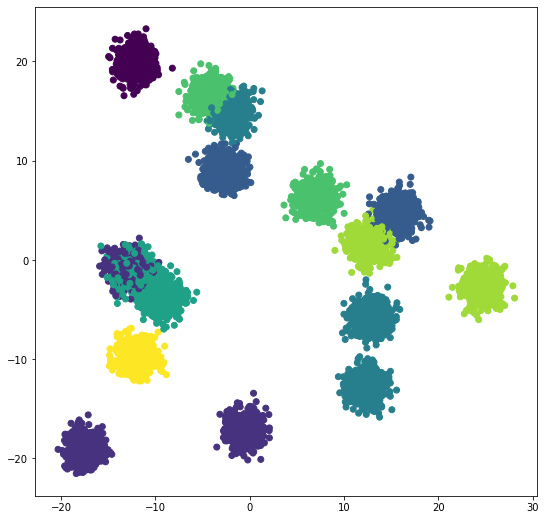

In [37]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
p = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t) # plot กราฟดูการกระจายของ data ที่ถูกลด dimension

จากกราฟ มีกลุ่มข้อมูลที่แบ่งเป็นสีได้8สี ดังนั้นจึงหาจำนวนกลุ่มที่เหมาะสมในการแบ่งกลุ่ม

**การหาค่า cluster ที่เหมาะสมกับข้อมูลด้วยวิธี The elbow method**

In [28]:
kmeans.inertia_  # ผลรวมของระยะกำลังสองของตัวอย่างไปยังศูนย์กลางของclusterที่ใกล้ที่สุด

5554355.097216646

In [ ]:
SSE = list()
for b in [1,2,3,4,5,6,7,8]: # for loop ตัวแปร b ตั้งแต่ 1 ถึง 8
    kmeans = KMeans(n_clusters = b , random_state = 2021)
    BB = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE # คือค่า Sum of Squared Errors

[21892839.273799036,
 12270829.924650874,
 10427484.81555465,
 9248028.122197706,
 8168543.113143556,
 7226154.274885877,
 6180489.370492548,
 5554355.097216646]

จากค่าที่ได้มาทำการ plot กราฟ เพื่อตรวจดูว่ามีทั้งหมดกี่กลุ่ม

In [ ]:
matplotlib.rcParams['figure.figsize']=[9,9] # ขนาดกราฟ

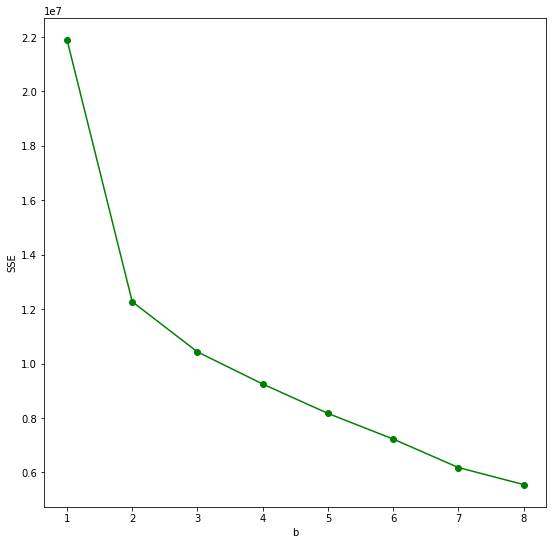

In [ ]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-g') # plot กราฟแสดงค่า SSE
plt.xlabel('b') ## กำหนดให้แกน x เป็น 'b'
plt.ylabel('SSE'); ## กำหนดแกน y ชื่อ 'SSE'

In [ ]:
matplotlib.rcParams['figure.figsize']=[9,9]

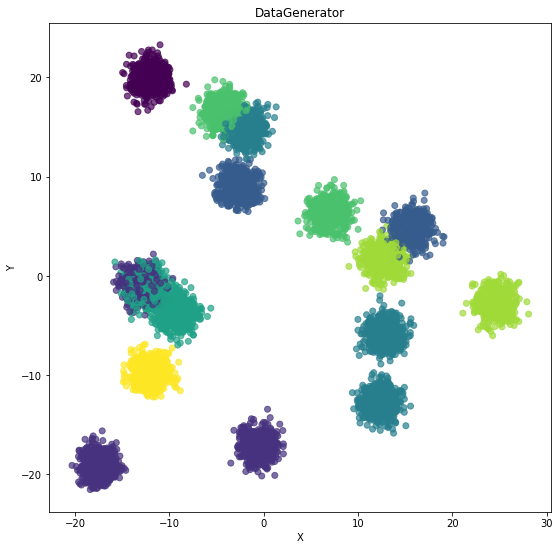

In [38]:
kmeans = KMeans(n_clusters = 4,random_state=2021)
kmeans.fit(Data)
p = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟ หลังจากที่ได้ทำการจัดกลุ่ม k เท่ากับ 8 กลุ่ม

## **3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

โดยเป็นการลดข้อมูลโดยใช้วิธี MDS

##**MDS**

**Import**

In [ ]:
from sklearn.manifold import MDS

**Define**

In [ ]:
mds = MDS(n_components=2)

**Fit transform**

In [ ]:
new_mds = mds.fit_transform(Data)

**จัดกลุ่มจากการวัดระยะห่างระหว่างจุดข้อมูล**

In [ ]:
kmeans_23 = KMeans(n_clusters=4,random_state=2021)
kmeans_23.fit(Data)
g = kmeans_23.predict(Data)

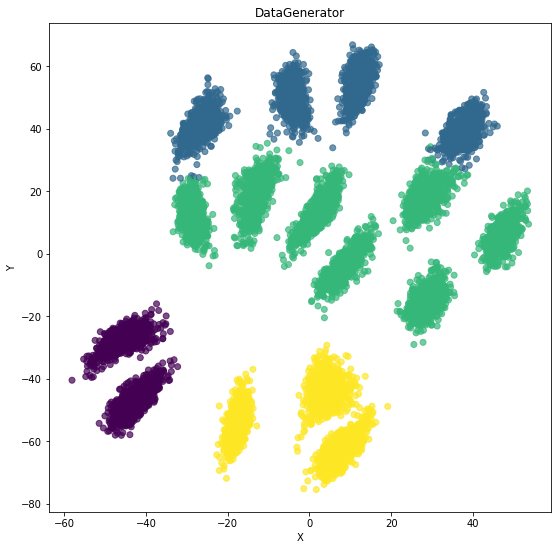

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

##**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

###**กราฟ PCA**

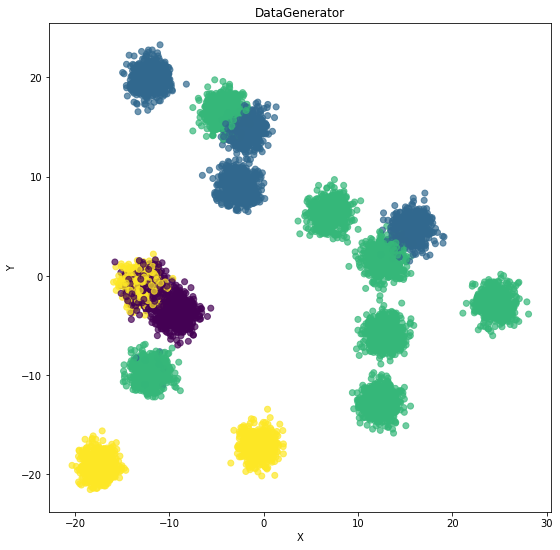

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

###**กราฟ MDS**

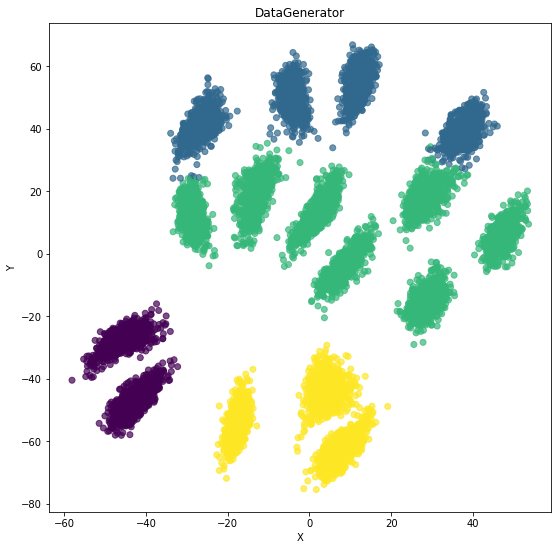

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

ดังนั้น จากการเปรียบเทียบกราฟ PCA และ กราฟ MDS แตกต่างกันจะเห็นการกระจายของข้อมูลที่แตกต่างกัน